![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> Computer Vision Project 2 Part C
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;">Part C
​

<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">  Import the necessary libraries </h2> 

In [173]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__) 
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

2.12.0


<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">  Unzip, read and Load data(‘PINS.zip’) into session. </h2> 

In [141]:
import zipfile

# Unzip the file
with zipfile.ZipFile('PINS.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the data here as per your requirement

print("Extraction done!")

Extraction done!


<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Write function to create metadata of the image. </h2> 

In [142]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    

<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">  Function to load metadata. </h2>  

In [143]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)
# metadata = load_metadata('images')
metadata = load_metadata('PINS')

<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Define function to load image. </h2> 

In [144]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Load a sample image. </h2> 

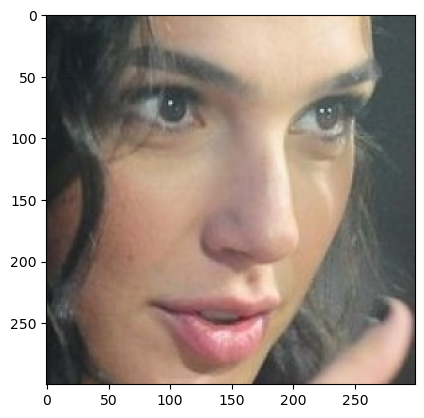

In [146]:
    plt.imshow(load_image('/Users/ADMIN/PINS/pins_gal gadot face/gal gadot face48.jpg'))

<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> VGG Face model. </h2> 

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

<p style = "font-size:20px; color: #007580 "><strong> Load the model </strong></p>


In [150]:
model = vgg_face()
WEIGHTS_FILE = "/Users/ADMIN/vgg_face_weights.h5"
model.load_weights(WEIGHTS_FILE)

<p style = "font-size:20px; color: #007580 "><strong> Get vgg_face_descriptor </strong></p>

In [152]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [153]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
1/1 [==============================] - 2s 2s/step
(2622,)


<p style = "font-size:20px; color: #007580 "><strong> Generate embeddings for all images </strong></p>

- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [156]:
total_images = len(metadata)

print('total_images :', total_images)

total_images : 10770


In [157]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
  img_path = m.image_path()
  img = load_image(m.image_path())

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))

  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

1/1 [==============================] - 1s 986ms/step


1/1 [==============================] - 1s 707ms/step


1/1 [==============================] - 1s 681ms/step


1/1 [==============================] - 1s 657ms/step


1/1 [==============================] - 1s 702ms/step


1/1 [==============================] - 1s 699ms/step


1/1 [==============================] - 1s 683ms/step


1/1 [==============================] - 1s 689ms/step


1/1 [==============================] - 1s 900ms/step


1/1 [==============================] - 1s 678ms/step


1/1 [==============================] - 1s 722ms/step


1/1 [==============================] - 1s 704ms/step


1/1 [==============================] - 1s 714ms/step


1/1 [==============================] - 1s 775ms/step


1/1 [==============================] - 1s 700ms/step


1/1 [==============================] - 1s 705ms/step


1/1 [==============================] - 1s 731ms/step


1/1 [==============================] - 1s 736ms/step


1/1 [==============================] - 1s 711ms/step


1/1 [==============================] - 1s 691ms/step


1/1 [==============================] - 1s 708ms/step


1/1 [==============================] - 1s 729ms/step


1/1 [==============================] - 1s 701ms/step


1/1 [==============================] - 1s 698ms/step


1/1 [==============================] - 1s 967ms/step


1/1 [==============================] - 1s 968ms/step


1/1 [==============================] - 1s 679ms/step


1/1 [==============================] - 1s 676ms/step


1/1 [==============================] - 1s 712ms/step


1/1 [==============================] - 1s 671ms/step


1/1 [==============================] - 1s 700ms/step


1/1 [==============================] - 1s 685ms/step


1/1 [==============================] - 1s 694ms/step


1/1 [==============================] - 1s 684ms/step


1/1 [==============================] - 1s 729ms/step


1/1 [==============================] - 1s 656ms/step


1/1 [==============================] - 1s 675ms/step


1/1 [==============================] - 1s 566ms/step


1/1 [==============================] - 1s 575ms/step


1/1 [==============================] - 1s 557ms/step


1/1 [==============================] - 1s 566ms/step


1/1 [==============================] - 1s 607ms/step


1/1 [==============================] - 1s 588ms/step


1/1 [==============================] - 1s 617ms/step


1/1 [==============================] - 1s 616ms/step


1/1 [==============================] - 1s 734ms/step


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 589ms/step


1/1 [==============================] - 1s 594ms/step


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 625ms/step


1/1 [==============================] - 1s 625ms/step


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 594ms/step


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 609ms/step


1/1 [==============================] - 1s 660ms/step


1/1 [==============================] - 1s 828ms/step


1/1 [==============================] - 1s 828ms/step


1/1 [==============================] - 1s 844ms/step


1/1 [==============================] - 1s 844ms/step


1/1 [==============================] - 1s 859ms/step


1/1 [==============================] - 1s 859ms/step


1/1 [==============================] - 1s 864ms/step


1/1 [==============================] - 1s 859ms/step


1/1 [==============================] - 1s 895ms/step


1/1 [==============================] - 1s 833ms/step


1/1 [==============================] - 1s 809ms/step


In [158]:
print('embeddings shape :', embeddings.shape) 

embeddings shape : (10770, 2622)


<a id = '4.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Function to calculate distance between given 2 pairs of images.</h2> 

In [159]:
def distance(emb1, emb2):
    return np.sqrt(np.sum(np.square(emb1 - emb2)))


<a id = '4.3'></a>
<p style = "font-size:20px; color: #007580 "><strong> Plot images and get distance between the pairs </strong></p>


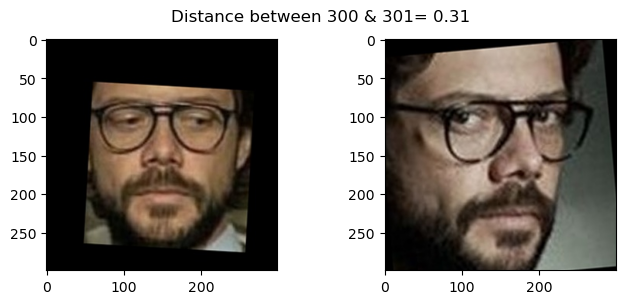

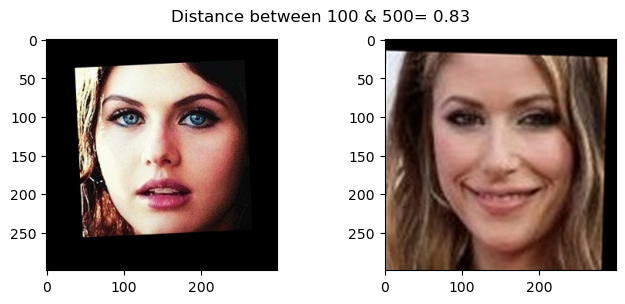

In [160]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(300,301)
show_pair(100, 500)

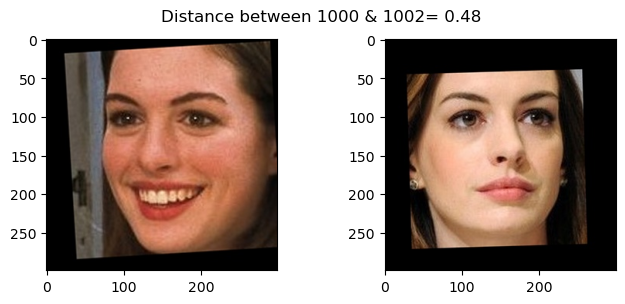

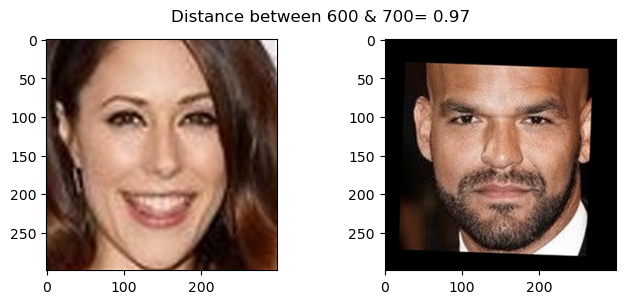

In [161]:
show_pair(1000,1002)
show_pair(600, 700)

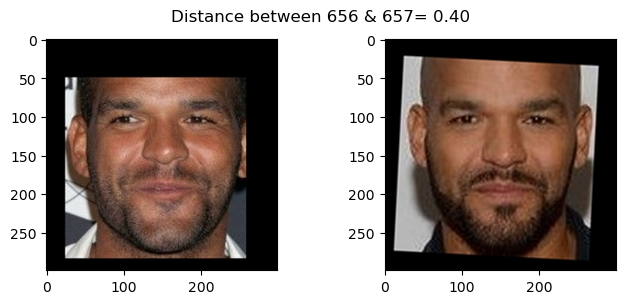

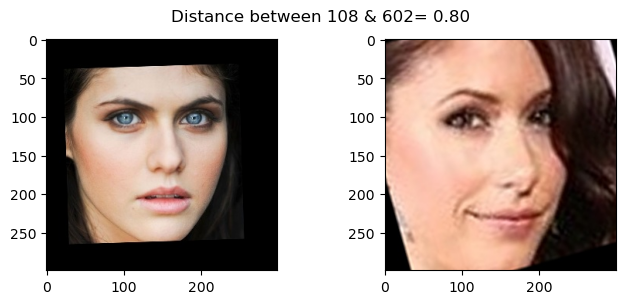

In [162]:
show_pair(656, 657)
show_pair(108, 602)

<a id = '4.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Create train and test sets.</h2> 

In [163]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities

X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

In [164]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (9573,2622)
y_train shape : (9573,)
X_test shape : (1197,2622)
y_test shape : (1197,)


<p style = "font-size:20px; color: #007580 "><strong> Encode the Labels </strong></p>
- Encode the targets
- Use LabelEncoder

In [165]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_le = label_encoder.transform(y_train)
y_test_le = label_encoder.transform(y_test)


In [166]:
print('y_train_le : ', y_train_le)
print('y_test_le : ', y_test_le)


y_train_le :  [ 0  0  0 ... 99 99 99]
y_test_le :  [ 0  0  0 ... 99 99 99]


<p style = "font-size:20px; color: #007580 "><strong> Standardize the feature values </strong></p> 
- Scale the features using StandardScaler

In [167]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

<p style = "font-size:20px; color: #007580 "><strong> Reduce dimensions using PCA </strong></p> 
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [168]:
pca = PCA(n_components=128)
pca.fit(X_train_s)

X_train_pca = pca.transform(X_train_s)
X_test_pca = pca.transform(X_test_s)


<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">  Model Building and Validation </h2> 

In [169]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train_pca , y_train_le)

SVC()

In [170]:
model_svc.score(X_test_pca, y_test_le)

0.960735171261487

In [171]:
# Use trained model to predict on test set
y_pred = model_svc.predict(X_test_pca)

# Convert predicted labels to person names using label encoder
y_pred_names = label_encoder.inverse_transform(y_pred)

# Print out predicted labels and ground truth labels
for i in range(len(y_test)):
    print(f'Test image {i+1} belongs to {y_pred_names[i]} (predicted) and {y_test[i]} (actual).')

# Calculate and print out model accuracy
accuracy = model_svc.score(X_test_pca, y_test_le)
print(f'Model accuracy on test set: {accuracy:.2f}')


Test image 1 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 2 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 3 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 4 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 5 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 6 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 7 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 8 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 9 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 10 belongs to pins_Aaron Paul (predicted) and pins_Aaron Paul (actual).
Test image 11 belongs to pins_alexandra daddario (predicted) and pins_alexandra daddario (actual).
Test image 12 belongs to pins_alexandra daddario (predicted) and pins_alexandra 

Model accuracy on test set: 0.96


<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Import and display the the test images. </h2> 



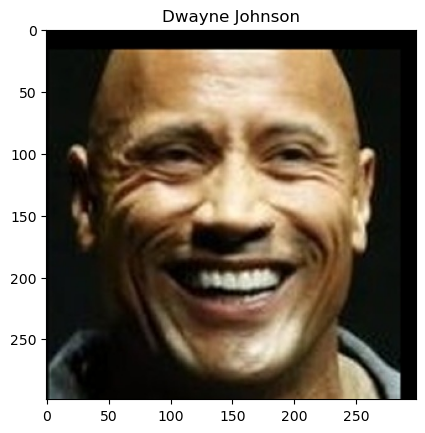

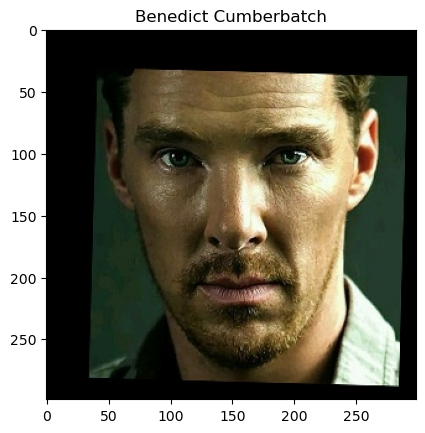

In [172]:
import cv2

# Load and display the Dwayne Johnson test image
dwayne_img_path = 'C:/Users/ADMIN/PINS/pins_Dwayne Johnson/Dwayne Johnson4.jpg'
dwayne_img = cv2.imread(dwayne_img_path)
dwayne_img = cv2.cvtColor(dwayne_img, cv2.COLOR_BGR2RGB) # convert from BGR to RGB color space
plt.imshow(dwayne_img)
plt.title('Dwayne Johnson')
plt.show()

# Load and display the Benedict Cumberbatch test image
benedict_img_path = 'C:/Users/ADMIN/PINS/pins_Benedict Cumberbatch/Benedict Cumberbatch9.jpg'
benedict_img = cv2.imread(benedict_img_path)
benedict_img = cv2.cvtColor(benedict_img, cv2.COLOR_BGR2RGB) # convert from BGR to RGB color space
plt.imshow(benedict_img)
plt.title('Benedict Cumberbatch')
plt.show()


<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">  SVM model to predict the 
face on both test images. </h2> 



In [174]:
# Load the Dwayne Johnson test image, preprocess it and extract its features
dwayne_img = load_image(dwayne_img_path)
dwayne_img = (dwayne_img / 255.).astype(np.float32)
dwayne_img = cv2.resize(dwayne_img, dsize=(224, 224))
dwayne_emb = vgg_face_descriptor.predict(np.expand_dims(dwayne_img, axis=0))[0]
dwayne_emb_s = scaler.transform(np.expand_dims(dwayne_emb, axis=0))
dwayne_emb_pca = pca.transform(dwayne_emb_s)

# Use the trained SVM model to predict the identity of the Dwayne Johnson test image
dwayne_pred = model_svc.predict(dwayne_emb_pca)
dwayne_pred_name = label_encoder.inverse_transform(dwayne_pred)[0]

# Load the Benedict Cumberbatch test image, preprocess it and extract its features
benedict_img = load_image(benedict_img_path)
benedict_img = (benedict_img / 255.).astype(np.float32)
benedict_img = cv2.resize(benedict_img, dsize=(224, 224))
benedict_emb = vgg_face_descriptor.predict(np.expand_dims(benedict_img, axis=0))[0]
benedict_emb_s = scaler.transform(np.expand_dims(benedict_emb, axis=0))
benedict_emb_pca = pca.transform(benedict_emb_s)

# Use the trained SVM model to predict the identity of the Benedict Cumberbatch test image
benedict_pred = model_svc.predict(benedict_emb_pca)
benedict_pred_name = label_encoder.inverse_transform(benedict_pred)[0]

# Print out the predicted identities of the test images
print(f'The Dwayne Johnson test image is predicted to be {dwayne_pred_name}.')
print(f'The Benedict Cumberbatch test image is predicted to be {benedict_pred_name}.')


1/1 [==============================] - 1s 778ms/step
The Dwayne Johnson test image is predicted to be pins_Dwayne Johnson.
The Benedict Cumberbatch test image is predicted to be pins_Benedict Cumberbatch.


![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)